In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
df = pd.DataFrame(
                  [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
                   ], columns = ['cgpa',	'iq',	'is_placed']
)
df.head(2)

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1


In [3]:
#Initial prediction - log(odds)

df['pred1(log-odds)'] = np.log(5/3) #Five 1s and three 0s in target column
df.head(2)

,cgpa,iq,is_placed,pred1(log-odds)
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826


In [6]:
#convert log(odds) to probability
df['pred1(probability)'] = 1 / (1 + np.exp(-df['pred1(log-odds)']))
df.head(2)

,cgpa,iq,is_placed,pred1(log-odds),pred1(probability)
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625


In [7]:
#calculate residuals
df['res1'] = df['is_placed'] - df['pred1(probability)']
df.head(2)

,cgpa,iq,is_placed,pred1(log-odds),pred1(probability),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375


In [11]:
#Second Model - First Decision Tree Regressor (even for classification problem)
from sklearn.tree import DecisionTreeRegressor
dtr1 = DecisionTreeRegressor(max_leaf_nodes=3,random_state=42)
dtr1.fit(df.iloc[:,0:2].values,df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=42)

[Text(0.4, 0.8333333333333334, 'cgpa <= 6.375\nsquared_error = 0.234\nsamples = 8\nvalue = 0.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 0.375'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'iq <= 132.5\nsquared_error = 0.24\nsamples = 5\nvalue = -0.225'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = -0.625'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.222\nsamples = 3\nvalue = 0.042')]

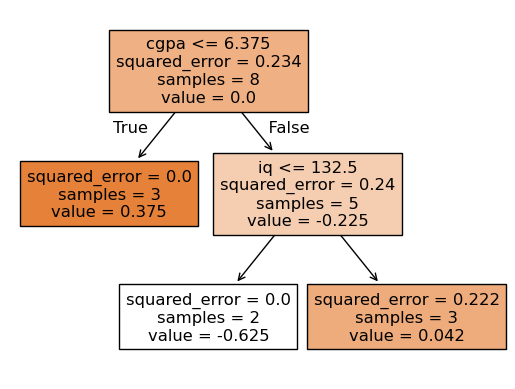

In [14]:
from sklearn.tree import plot_tree
plot_tree(dtr1,feature_names=['cgpa','iq'],filled=True)

In [15]:
#identifying Leaf Nodes for data values
df['leaf_entry'] = dtr1.apply(df.iloc[:,0:2].values)
df.head(2)

,cgpa,iq,is_placed,pred1(log-odds),pred1(probability),res1,leaf_entry
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1


In [23]:
def return_logs(leaf):
  temp_df = df[df['leaf_entry'] == leaf]
  numerator = temp_df['res1'].sum()
  denominator = sum(temp_df['pred1(probability)'] * (1 - temp_df['pred1(probability)']))
  return round(numerator/denominator,2)

In [24]:
df['pred2(log-odds)'] = df['pred1(log-odds)'] + df['leaf_entry'].apply(return_logs)
df.head(2)

,cgpa,iq,is_placed,pred1(log-odds),pred1(probability),res1,leaf_entry,pred2(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826


In [25]:
df['pred2(probability)'] = 1 / (1 + np.exp(-df['pred2(log-odds)']))
df.head(2)

,cgpa,iq,is_placed,pred1(log-odds),pred1(probability),res1,leaf_entry,pred2(log-odds),pred2(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951


In [26]:
df['res2'] = df['is_placed'] - df['pred2(probability)']
df.head(2)

,cgpa,iq,is_placed,pred1(log-odds),pred1(probability),res1,leaf_entry,pred2(log-odds),pred2(probability),res2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049


In [27]:
dtr2 = DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

dtr2.fit(df.iloc[:,0:2].values, df.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

[Text(0.6, 0.8333333333333334, 'node #0\ncgpa <= 6.995\nsquared_error = 0.09\nsamples = 8\nvalue = 0.015'),
 Text(0.4, 0.5, 'node #1\niq <= 136.5\nsquared_error = 0.09\nsamples = 5\nvalue = -0.089'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'node #3\nsquared_error = 0.008\nsamples = 4\nvalue = 0.055'),
 Text(0.6, 0.16666666666666666, 'node #4\nsquared_error = 0.0\nsamples = 1\nvalue = -0.666'),
 Text(0.8, 0.5, 'node #2\nsquared_error = 0.043\nsamples = 3\nvalue = 0.188'),
 Text(0.7, 0.6666666666666667, '  False')]

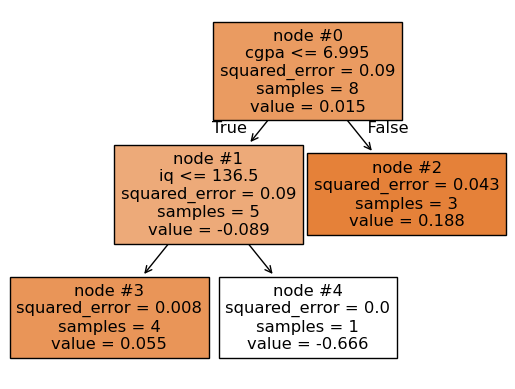

In [28]:
plot_tree(dtr2, feature_names=['cgpa','iq'],filled=True, node_ids=True)

In [29]:
df['leaf_entry2'] = dtr2.apply(df.iloc[:,0:2])
df.head(2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pred1(log-odds),pred1(probability),res1,leaf_entry,pred2(log-odds),pred2(probability),res2,leaf_entry2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3


In [32]:
def return_logs(leaf):
  num = df[df['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(df[df['leaf_entry2'] == leaf]['pred2(probability)'] * (1 - df[df['leaf_entry2'] == leaf]['pred2(probability)']))
  return round(num/den,2)

In [33]:
df['pred3(log-odds)'] = df['pred1(log-odds)'] + df['pred2(log-odds)'] + df['leaf_entry2'].apply(return_logs)
df.head(2)

,cgpa,iq,is_placed,pred1(log-odds),pred1(probability),res1,leaf_entry,pred2(log-odds),pred2(probability),res2,leaf_entry2,pred3(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651


In [34]:
df['pred3(probability)'] = 1/(1+np.exp(-df['pred3(log-odds)']))
df.head(2)

,cgpa,iq,is_placed,pred1(log-odds),pred1(probability),res1,leaf_entry,pred2(log-odds),pred2(probability),res2,leaf_entry2,pred3(log-odds),pred3(probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349,0.255717
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896


In [35]:
df['res_final'] = df['is_placed'] - df['pred3(probability)']

df[['res1','res2','res_final']]

,res1,res2,res_final
0,-0.625,-0.103477,-0.255717
1,0.375,0.108049,0.039104
2,0.375,0.108049,0.039104
3,0.375,0.108049,0.039104
4,-0.625,-0.666151,-0.142052
5,0.375,0.333849,0.095207
6,0.375,0.333849,0.095207
7,-0.625,-0.103477,-0.354722
